In [ ]:
  # Some helpful functions to run for every notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# Loading dummy data available on github
!wget https://raw.githubusercontent.com/17rsuraj/data-curious/master/TowardsDataScience/Dummy_Sales_Data_v1.csv

--2023-02-10 21:14:24--  https://raw.githubusercontent.com/17rsuraj/data-curious/master/TowardsDataScience/Dummy_Sales_Data_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 908599 (887K) [text/plain]
Saving to: ‘Dummy_Sales_Data_v1.csv’

Dummy_Sales_Data_v1 100%[===================>] 887.30K  --.-KB/s    in 0.01s   

2023-02-10 21:14:24 (84.7 MB/s) - ‘Dummy_Sales_Data_v1.csv’ saved [908599/908599]



In [ ]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
df = pd.read_csv('Dummy_Sales_Data_v1.csv')
df

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
0,2951110000999929511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,444116
1,2181910000999921819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,444772
2,3239110000999932391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,444666
3,1112610000999911126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,444007
4,1548310000999915483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,444223
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2301610000999923016,75,201,Not Delivered,2021-10-16,Home,Sofia,20,14.0,Kenya,H-555,444885
9995,1847410000999918474,37,135,Shipped,2021-10-03,Healthcare,Maria,30,23.0,China,HC-901,444772
9996,2385710000999923857,81,207,Delivered,2021-11-13,Office,Emma,29,18.0,USA,O-203,445113
9997,2281610000999922816,18,117,Shipped,2021-12-23,Fashion,Stella,22,24.0,Italy,F-101,445553


# Grouping data in Pandas

Pandas group-by is generally used to group rows in a dataframe based on the attributes of a column. This method is generally used to look at different rows having similar attributes and also to aggregate rows with different attributes. There are a lot of other ways to perform grouping in pandas as well

## Group Counts

In [ ]:
# Find the number of unique groups one can form using that column
df['Product_Category'].nunique()

5

In [ ]:
df['Product_Category'].unique()

array(['Healthcare', 'Office', 'Fashion', 'Entertainment', 'Home', nan],
      dtype=object)

In [ ]:
# Group By inbuilt
df_grouped = df.groupby(['Product_Category'])
df_grouped

In [ ]:
df_grouped.ngroups

5

In [ ]:
# Size of groups
df.groupby("Product_Category").size()

Product_Category
Entertainment    1968
Fashion          1971
Healthcare       1953
Home             2060
Office           2011
dtype: int64

In [ ]:
# Count of different columns per group (returns only non-null rows)
df.groupby("Product_Category").count()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
Product_Category,,,,,,,,,,,
Entertainment,1968,1968,1968,1968,1968,1968,1968,1959,1968,1968,1968
Fashion,1971,1971,1971,1971,1971,1971,1971,1963,1971,1971,1971
Healthcare,1953,1953,1953,1953,1953,1953,1953,1937,1953,1953,1953
Home,2060,2060,2060,2060,2060,2060,2060,2049,2060,2060,2060
Office,2011,2011,2011,2011,2011,2011,2011,2004,2011,2011,2011


In [ ]:
# Similar method without group-by
df['Product_Category'].value_counts()

Home             2060
Office           2011
Fashion          1971
Entertainment    1968
Healthcare       1953
Name: Product_Category, dtype: int64

## Accessing rows based on groups

In [ ]:
# Get the first entry for every group
df.groupby("Product_Category").first()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
Product_Category,,,,,,,,,,,
Entertainment,4934810000999949348,51,204,Not Delivered,2021-11-13,Abdul,32,18.0,UK,ENT-188,445113
Fashion,1112610000999911126,33,133,Not Shipped,2021-07-30,Abdul,34,24.0,USA,F-555,444007
Healthcare,2951110000999929511,92,238,Not Delivered,2021-08-08,Pablo,21,25.0,Singapore,HC-188,444116
Home,4337210000999943372,57,226,Not Shipped,2021-09-27,John,24,14.0,UK,H-555,444666
Office,2181910000999921819,61,136,Not Delivered,2021-10-03,Pablo,34,14.0,UK,O-555,444772


In [ ]:
# Get the last entry for every group
df.groupby("Product_Category").last()

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
Product_Category,,,,,,,,,,,
Entertainment,1468010000999914680,53,229,Delivered,2021-07-12,Anthony,25,12.0,Singapore,ENT-630,443889
Fashion,2281610000999922816,18,117,Shipped,2021-12-23,Stella,22,24.0,Italy,F-101,445553
Healthcare,1847410000999918474,37,135,Shipped,2021-10-03,Maria,30,23.0,China,HC-901,444772
Home,2301610000999923016,75,201,Not Delivered,2021-10-16,Sofia,20,14.0,Kenya,H-555,444885
Office,2385710000999923857,81,207,Delivered,2021-11-13,Emma,29,18.0,USA,O-203,445113


In [ ]:
# Get the n-th entry for every group
df.groupby("Product_Category").nth(3)

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
Product_Category,,,,,,,,,,,
Entertainment,4030410000999940304,21,123,Not Delivered,2021-10-10,Kristen,30,15.0,India,ENT-188,444779
Fashion,2804110000999928041,31,163,Not Shipped,2021-12-23,Abdul,34,16.0,Kenya,F-901,445553
Healthcare,4276410000999942764,83,224,Not Delivered,2021-07-10,Sofia,24,24.0,Kenya,HC-203,443887
Home,3105110000999931051,79,213,Delivered,2021-10-26,Abdul,27,14.0,China,H-203,444995
Office,1444810000999914448,5,119,Not Shipped,2021-10-13,Stella,33,20.0,India,O-555,444882


In [ ]:
# Only slice specific subgroups
df_grouped = df.groupby(['Product_Category'])
df_grouped.get_group('Entertainment')

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
5,4934810000999949348,51,204,Not Delivered,2021-11-13,Entertainment,Abdul,32,18.0,UK,ENT-188,445113
12,3882310000999938823,78,219,Delivered,2021-10-29,Entertainment,Emma,24,19.0,USA,ENT-901,444998
20,2469010000999924690,15,156,Shipped,2021-12-13,Entertainment,Pablo,29,19.0,Germany,ENT-101,445443
21,4030410000999940304,21,123,Not Delivered,2021-10-10,Entertainment,Kristen,30,15.0,India,ENT-188,444779
23,3629310000999936293,78,155,Delivered,2021-12-02,Entertainment,Anthony,35,12.0,China,ENT-188,445332
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,4220510000999942205,39,145,Shipped,2021-12-29,Entertainment,Sofia,21,25.0,Kenya,ENT-901,445559
9973,1074010000999910740,2,186,Not Delivered,2021-07-22,Entertainment,John,35,21.0,Germany,ENT-630,443999
9990,4241810000999942418,94,211,Not Shipped,2021-07-07,Entertainment,Emma,27,19.0,Singapore,ENT-901,443884
9993,2363310000999923633,82,116,Shipped,2021-09-21,Entertainment,Emma,33,12.0,Singapore,ENT-188,444660


In [ ]:
# Same as how slicing a dataframe is done
df[df["Product_Category"]=='Fashion']

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
3,1112610000999911126,33,133,Not Shipped,2021-07-30,Fashion,Abdul,34,24.0,USA,F-555,444007
4,1548310000999915483,13,189,Not Delivered,2021-08-15,Fashion,Stella,24,19.0,Kenya,F-555,444223
7,4797510000999947975,48,240,Delivered,2021-10-04,Fashion,Abdul,22,21.0,Kenya,F-203,444773
8,2804110000999928041,31,163,Not Shipped,2021-12-23,Fashion,Abdul,34,16.0,Kenya,F-901,445553
9,1735910000999917359,62,214,Not Delivered,2021-08-14,Fashion,John,22,17.0,Germany,F-901,444222
...,...,...,...,...,...,...,...,...,...,...,...,...
9985,1541410000999915414,92,230,Shipped,2021-10-26,Fashion,Emma,26,24.0,China,F-901,444995
9987,4659010000999946590,53,105,Delivered,2021-09-19,Fashion,Anthony,20,22.0,USA,F-630,444558
9989,1928010000999919280,17,235,Shipped,2021-09-14,Fashion,Emma,27,18.0,Germany,F-901,444553
9992,3733010000999937330,28,160,Shipped,2021-09-27,Fashion,Anthony,21,14.0,India,F-188,444666


## Aggregation

In [ ]:
df_group = df.groupby("Product_Category")
#Select only required columns
df_columns = df_group[["UnitPrice(USD)","Quantity"]]
#Apply aggregate function
df_columns.mean()

,UnitPrice(USD),Quantity
Product_Category,,
Entertainment,176.038618,49.851118
Fashion,176.117199,51.255200
Healthcare,175.489503,50.905274
Home,175.354854,50.705340
Office,175.127300,50.913476


In [ ]:
df.groupby("Product_Category")[["UnitPrice(USD)"]].aggregate([min,max,sum,'std','mean','median'])

UnitPrice(USD)                                           
                            min  max     sum        std        mean median
Product_Category                                                          
Entertainment               100  250  346444  43.515969  176.038618  176.0
Fashion                     100  250  347127  43.653829  176.117199  177.0
Healthcare                  100  250  342731  43.325706  175.489503  176.0
Home                        100  250  361231  43.523668  175.354854  175.0
Office                      100  250  352181  43.662030  175.127300  174.0

# Using other conditions for accessing groups of data

In [ ]:
df.head(3)

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
0,2951110000999929511,92,238,Not Delivered,2021-08-08,Healthcare,Pablo,21,25.0,Singapore,HC-188,444116
1,2181910000999921819,61,136,Not Delivered,2021-10-03,Office,Pablo,34,14.0,UK,O-555,444772
2,3239110000999932391,67,235,Not Delivered,2021-09-27,Office,Kristen,25,11.0,Kenya,O-188,444666


In [ ]:
## Combining conditions
df[((df['Product_Category'] == 'Office') & (df['Shipping_Address'] == 'USA'))]

,OrderID,Quantity,UnitPrice(USD),Status,OrderDate,Product_Category,Sales_Manager,Shipping_Cost(USD),Delivery_Time(Days),Shipping_Address,Product_Code,OrderCode
174,1850310000999918503,5,168,Delivered,2021-09-02,Office,Maria,28,12.0,USA,O-101,444441
262,3932710000999939327,89,102,Not Shipped,2021-11-23,Office,Jacob,21,15.0,USA,O-203,445223
287,1181110000999911811,75,207,Delivered,2021-09-10,Office,Stella,23,14.0,USA,O-630,444449
400,3215910000999932159,30,121,Shipped,2021-07-04,Office,Emma,29,18.0,USA,O-203,443881
528,2939710000999929397,54,116,Shipped,2021-08-14,Office,Stella,32,12.0,USA,O-555,444222
...,...,...,...,...,...,...,...,...,...,...,...,...
9942,4010710000999940107,93,209,Shipped,2021-11-13,Office,Emma,31,24.0,USA,O-203,445113
9949,3850510000999938505,19,151,Delivered,2021-09-06,Office,Stella,34,20.0,USA,O-101,444445
9976,4106710000999941067,47,237,Not Shipped,2021-09-10,Office,Stella,24,15.0,USA,O-188,444449
9991,4936610000999949366,6,183,Shipped,2021-11-16,Office,Emma,26,22.0,USA,O-901,445116


# Plotting

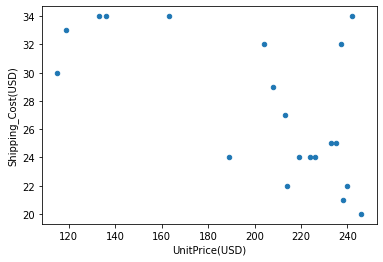

In [ ]:
# Scatter Plots in pandas
# df[:20] represents only the first 20 values of the dataframe.
# We've done that visual clarity here and mentioning the number of rows is not required unless specified
df[:20].plot.scatter(x = 'UnitPrice(USD)', y = 'Shipping_Cost(USD)')

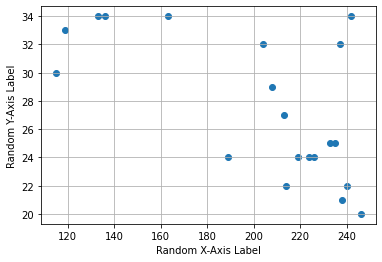

In [ ]:
# We can use matplotlib to customize the same plot
plt.scatter(x = df['UnitPrice(USD)'][:20], y = df['Shipping_Cost(USD)'][:20])
plt.xlabel('Random X-Axis Label')
plt.ylabel('Random Y-Axis Label')
plt.grid()
plt.show()

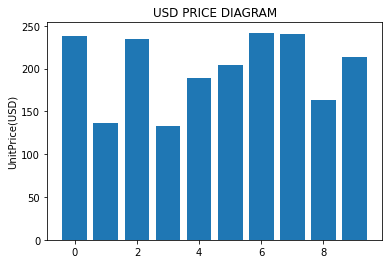

In [ ]:
# Bar plots
plt.bar(df[:10].index,df['UnitPrice(USD)'][:10])
plt.ylabel('UnitPrice(USD)')
plt.title("USD PRICE DIAGRAM")
plt.show()

## Subplots

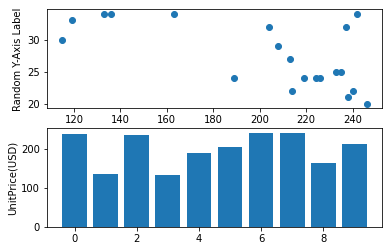

In [ ]:
# Creating multiple plots in the same diagram is pretty convenient with matplotlib
plt.subplot(2, 1, 1)
plt.scatter(x = df['UnitPrice(USD)'][:20], y = df['Shipping_Cost(USD)'][:20])
plt.xlabel('Random X-Axis Label')
plt.ylabel('Random Y-Axis Label')

plt.subplot(2, 1, 2)
plt.bar(df[:10].index,df['UnitPrice(USD)'][:10])
plt.ylabel('UnitPrice(USD)')


plt.show()

## Pie Charts

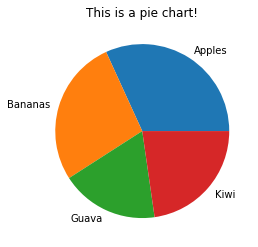

In [ ]:
y = np.array([35, 30, 20, 25])
labels = ["Apples", "Bananas", "Guava", "Kiwi"]
plt.pie(y, labels = labels)
plt.title("This is a pie chart!")
plt.show()

# References
The dataset and some code was used from [Suraj Gaurav's Blog](https://towardsdatascience.com/5-pandas-group-by-tricks-you-should-know-in-python-f53246c92c94).